In [35]:
import glob
import json
import numpy as np
import os

In [11]:
def register_bonus(year, base, bonus_months):
    path = "./income/{}年".format(year)
    os.makedirs(path, exist_ok=True)

    path = "./income/{}年/bonus.json".format(year)
    _json = {
        "base": base,
        "bonus_months": bonus_months
        }
    with open(path, "w") as f:
        json.dump(_json, f, indent=2)

In [12]:
def register_income(income, year, month):
    #ファイルへ出力
    _json = {
        "income": income,
        "month": month
        }

    path = "./income/{}年".format(year)
    os.makedirs(path, exist_ok=True)

    path = "./income/{}年/{}月.json".format(year, month)
    with open(path, "w") as f:
        json.dump(_json, f, indent=2)

    return

In [13]:
def calc_income(year):
    DEFAULT_BASE = 255600
    DEFAULT_BONUS_MONTH = 4
    #すでに登録月があるなら考慮
    past_income = glob.glob('./income/{}年/*月.json'.format(year))
    worked_months = len(past_income)
    remaining_months = 12 - worked_months

    result = 0
    ave_income = 0
    incomes = []
    #すでに働いた月の給与を加算
    for path in past_income:
        with open(path) as f:
            _json = json.load(f)
        result += int(_json["income"])
        incomes.append(int(_json["income"]))

    ave_income = np.mean(incomes)
    #まだ働いてない月の給与を補完
    result += ave_income * remaining_months

    #ボーナス分を加算
    base = 0
    bonus_months = 0
    path = glob.glob('./income/{}年/bonus.json'.format(year))[0]
    if path:
        with open(path) as f:
            _json = json.load(f)
            base = int(_json["base"])
            bonus_months = float(_json["bonus_months"])
    else:
        base = DEFAULT_BASE
        bonus_months = DEFAULT_BONUS_MONTH
        
    result += base * bonus_months
    print("年収：{}万円".format(result/10000))

    return

In [17]:
#ボーナスの登録
year = int(input("年："))
base = int(input("基本給："))
bonus_months = float(input("ボーナスの支給月数："))
register_bonus(year, base, bonus_months)

In [19]:
#月収の登録
year = int(input("年："))
month = int(input("月："))
income = int(input("支給額（月額）："))
register_income(income, year, month)

In [20]:
#年収の算出
year = int(input("年："))
calc_income(year)

年収：564.0万円


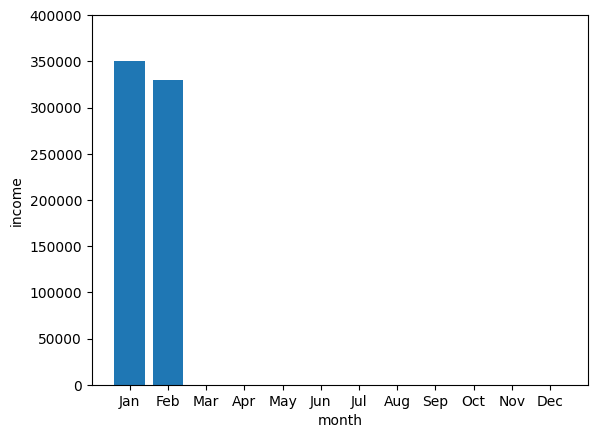

In [51]:
#毎月の推移が確認できるように
import pandas as pd
import matplotlib.pyplot as plt

#input
year = input("年：")

#visualize
data = []
for month in range(1, 13):
    path = glob.glob('./income/{}年/{}月.json'.format(year, month))
    if path:
        with open(path[0]) as f:
            _json = json.load(f)
    else:
        _json = {
            "income": 0,
            "month": month
        }
    data.append(_json)

df = pd.json_normalize(data)

fig, ax = plt.subplots(facecolor="w")
month_list = "January,February,March,April,May,June,July,August,September,October,November,December"
month_list = [month[0:3] for month in month_list.split(",")]

ax.bar(month_list,df["income"], label="income")

ax.set_ylim([0,400000]) 
ax.set_xlabel("month")
ax.set_ylabel("income")

plt.show()

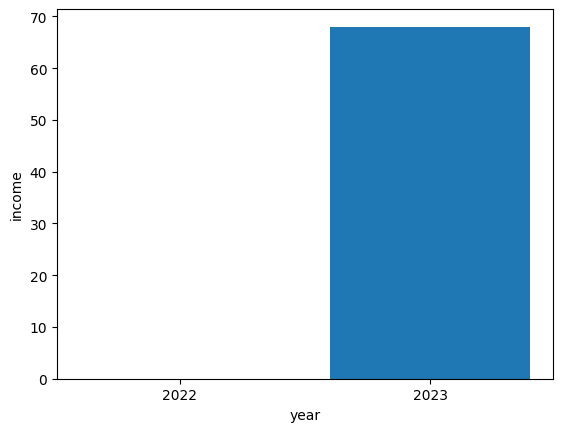

In [70]:
#毎年の推移が確認できるように
import pandas as pd
import matplotlib.pyplot as plt

year_path = glob.glob('./income/*年')
df = pd.DataFrame([])

for path in year_path:
    month_data = []
    year = path[-5:-1]
    for month in range(1, 13):
        _path = glob.glob('{}/{}月.json'.format(path, month))
        if _path:
            with open(_path[0]) as f:
                _json = json.load(f)
        else:
            _json = {
                "income": 0,
                "month": month
            }
        _json["year"] = year
        month_data.append(_json)
    _df = pd.json_normalize(month_data)
    df = pd.concat([df, _df])

df = df.groupby("year", as_index=False).sum()
df["income"] = df["income"]/10000

fig, ax = plt.subplots(facecolor="w")

ax.bar(df["year"],df["income"], label="income")
ax.set_xlabel("year")
ax.set_ylabel("income")

plt.show()